# Group Mahalanobis Project 1


## Topic & Goals

For Project 1, our group will focus on understanding population trends in various Southeast Asian countries as it relates to urbanization, globalization and economic development.

Our group is interested in analyzing multiple variables over time (20th century to today) including:<br>
Demographics<br>
Economic output<br>
Agricultural factors of production<br>
GDP and population Analysis<br>


In [21]:
"""
If necessary, uncomment and install:
"""
#!pip install wbdata
#!pip install cufflinks
#!pip install geopandas
#!pip install descartes
#!pip install iso3166

import iso3166 #iso3166.countries.get('country details')
import wbdata
import cufflinks as cf
import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
import datetime
cf.go_offline()

In [22]:
#wbdata.get_source() to get all sources
#wbdata.get_topic()
#wbdata.get_indicator()

source_id = 40 #Population Estimates and Projections
indicators = wbdata.get_indicator(source=source_id)

## Project Deliverables

### [#A] Population DataFrames

In [5]:
"""
population ranges available from dataset:
00-04, 05-09, 10-14, 15-19, 20-24, 25-29, 30-34, ..., 70-74, 75-79, above 80
"""

def pop_df(year='2021', group='all', age_lower=0, age_upper=100, location='world'):
    df = pop_df_helper(year, age_lower, age_upper, location)
        
    if group == 'males':
        return df.drop(columns = ['Female'])
    elif group == 'females':
        return df.drop(columns = ['Male'])
    else:
        total_pop = df["Female"] + df["Male"]
        df["Total"] = total_pop
    return df

# Returns a list of input strings for population age ranges
def pop_df_helper(year, age_lower, age_upper, location):
    if location != 'world':
        country_alpha3 = iso3166.countries.get(location).alpha3
        country_name = iso3166.countries.get(location).apolitical_name
    else:
        country_alpha3 = 'WLD'
        country_name = 'World'
    inputs = list_of_age_inputs(age_lower, age_upper)

    #create indicator-dictionaries required for WBData API
    indicator_dict_m = {}
    indicator_dict_f = {}
    for i in inputs:
        key_m = "SP.POP.{}.{}".format(i, 'MA')
        key_f = "SP.POP.{}.{}".format(i, 'FE')
        value = "{}-{}".format(i[:2], i[2:])
        indicator_dict_m[key_m] = value
        indicator_dict_f[key_f] = value

    #source_id = 40, refer to wbdata.get_source()
    wbdf_m = wbdata.get_dataframe(indicator_dict_m, country=country_alpha3, source=source_id)
    wbdf_f = wbdata.get_dataframe(indicator_dict_f, country=country_alpha3, source=source_id)
    datas_m = wbdf_m.query("date=='{}'".format(year)).sum(axis=0).tolist()
    datas_f = wbdf_f.query("date=='{}'".format(year)).sum(axis=0).tolist()
    df = pd.DataFrame({
        'Country': country_name,
        'Year': year,
        'Age': list(indicator_dict_m.values()),
        'Female': datas_f,
        'Male': datas_m
    })
    return df

# Returns a list of input strings for population age ranges
def list_of_age_inputs(age_lower, age_upper):
    def round_down(n):
        return max(0, n - n % 5)

    def round_up(n):
        return n - n % 5 + 5

    results = []
    r_lower_bound, r_upper_bound = round_down(age_lower), round_up(age_upper)   
    while r_lower_bound < min(79, r_upper_bound):
        results.append("{:02d}{:02d}".format(r_lower_bound, r_lower_bound + 4))
        r_lower_bound += 5
    if age_upper >= 80:
        results.append('80UP')
    return results

The **pop_df** function takes in the year, target group, age lower/upper bounds and the country as arguments. The function returns a dataframe.

Function call and output:

In [8]:
#group can be 'all', 'females' or 'males'
df = pop_df(year=2015, group='all', age_lower=10, age_upper=65, location='myanmar')
df

,Country,Year,Age,Female,Male,Total
0,Myanmar,2015,10-14,2588926.0,2604586.0,5193512.0
1,Myanmar,2015,15-19,2490373.0,2475952.0,4966325.0
2,Myanmar,2015,20-24,2328369.0,2279718.0,4608087.0
3,Myanmar,2015,25-29,2193006.0,2101669.0,4294675.0
4,Myanmar,2015,30-34,2076476.0,2001417.0,4077893.0
5,Myanmar,2015,35-39,2008285.0,1872498.0,3880783.0
6,Myanmar,2015,40-44,1882127.0,1701604.0,3583731.0
7,Myanmar,2015,45-49,1700927.0,1489300.0,3190227.0
8,Myanmar,2015,50-54,1455573.0,1225762.0,2681335.0
9,Myanmar,2015,55-59,1241131.0,999603.0,2240734.0


A dataframe is returned with the above format. The returned dataframe are used to construct some of our visualizations.

### [#A] Population Statistics

In [10]:
def pop_stats(year='2021', group='all', age_lower=0, age_upper=100, location='world'):
    df = pop_df(year, group, age_lower, age_upper, location)
    inputs = list_of_age_inputs(age_lower, age_upper);
    total = df.sum()[3]
    t = total.astype(int)
    age_l = inputs[0][0:2]
    
    if group == 'people':
        g = 'people'
    else:
        g = group
        
    if age_upper >= 80:
        age_h = '80 or over'
    else:
        age_h = inputs[-1][2:4]
    
    if location == 'world':
        loc = 'the world'
    else:
        loc = iso3166.countries.get(location).apolitical_name
    
    if year > 2021:
        print("By estimation, in {}, there will be {} {} aged {} to aged {} living in {}.".format(year, t, g, age_l, age_h, loc))
    else:
        print("In {}, there are {} {} aged {} to aged {} living in {}.".format(year, t, g, age_l, age_h, loc))
        

Our **pop_stats** function takes in the year, target group, age lower/upper bounds and the country as arguments. The function returns a summary containing the information we need.

Function call and output:

In [12]:
pop_stats(year=2021, group='males', age_lower=10, age_upper=45, location='world')

In 2021, there are 2341749700 males aged 10 to aged 49 living in the world.


### [#B] Population Pyramids

In [14]:
def draw_pop_pyramid(df):
    #negate values under 'Male'
    df['Male'] = df['Male'].apply(lambda x: -x)
    #remove unnecessary columns
    df.drop(columns = ['Country', 'Year', 'Total'])

    AgeClass = df['Age'][::-1]
    bar_plot = sns.barplot(x='Female', y='Age', data=df, order=AgeClass)
    bar_plot = sns.barplot(x='Male', y='Age', data=df, order=AgeClass)
    bar_plot.set(xlabel="Population (millions)", ylabel="Age-Group", title = "Population Pyramid")

**draw_pop_pyramid** function call and output:

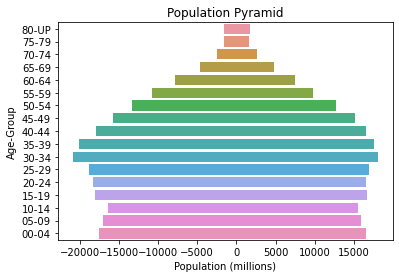

In [15]:
df = pop_df(year=2018, group='all', age_lower=0, age_upper=80, location='BRN')
draw_pop_pyramid(df)

### [#C] Animated Population Pyramids

### [#C] Population Maps

In [31]:
#A function that draws a geopanda graph, accepting a query_dictionary, the year and the title as arguments

def draw_geopanda_sea(indi_dict, year, title):
    countries = ['Myanmar', 'Thailand', 'Vietnam', 'Cambodia', 'Malaysia', 'Indonesia', 
                 "Philippines", "Brunei"]
    countries_iso3166 = ['MMR', 'THA', "VNM", 'KHM', 'MYS', 'IDN', 'PHL', 'BRN']
    
    df = wbdata.get_dataframe(indicators=indi_dict, country=countries_iso3166)
    df.reset_index(inplace=True)
    df['date'] = df['date'].astype(int)
    df = df[df['date'] == year]
    df = df.sort_values(by=['country'])

    world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
    world = world[world['name'].isin(countries)]
    world = world.sort_values(by=['name'])
    world['data_column'] = df['data_column'].values

    graph = geopandas.GeoDataFrame.plot(world, 'data_column', cmap='Spectral', figsize=(14, 14), legend=True, 
                                        legend_kwds={'shrink': 0.65})
    
    graph.set_title(title, size=25, pad=20);

    world.apply(lambda x: graph.annotate(text=x['name'], xy=x.geometry.centroid.coords[0], 
                                         ha='center'),axis=1);

**draw_geopanda_sea** function call and output:

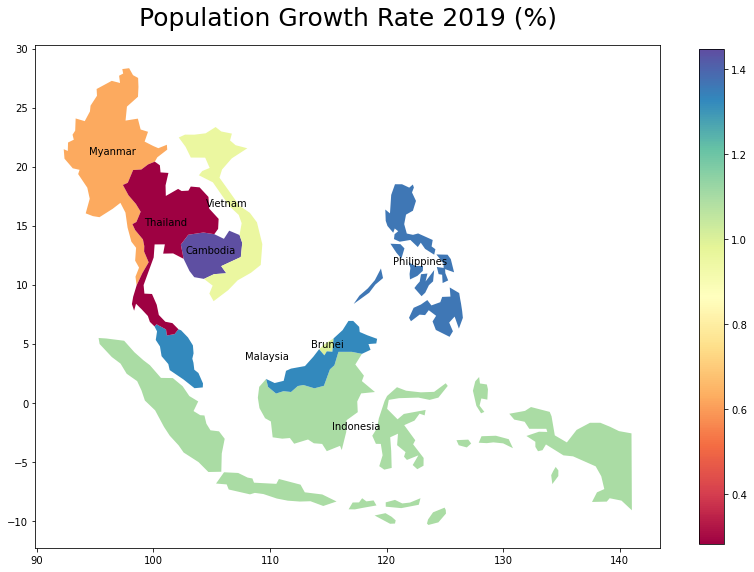

In [18]:
#indicator: Population Growth Rate (%)
indi_dict = {'SP.POP.GROW': 'data_column'}
draw_geopanda_sea(indi_dict, 2019, 'Population Growth Rate 2019 (%)')

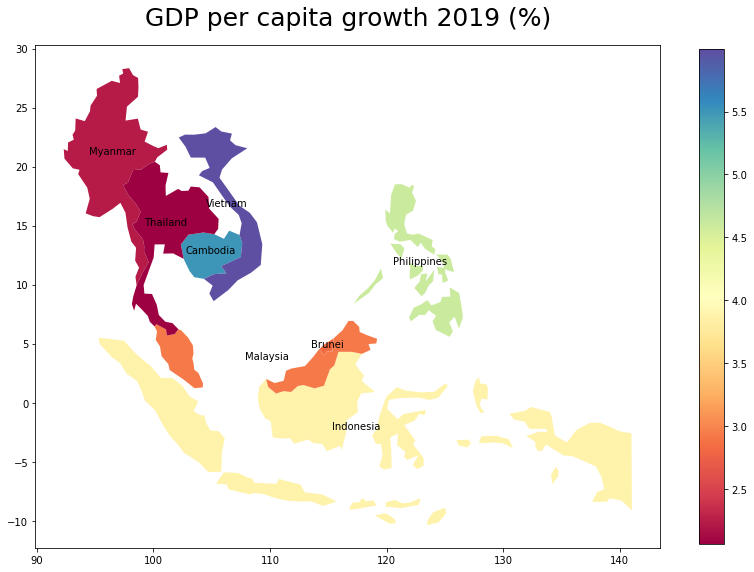

In [19]:
#indicator: GDP per capita growth (annual %)
indi_dict = {'NY.GDP.PCAP.KD.ZG': 'data_column'}
draw_geopanda_sea(indi_dict, 2019, 'GDP per capita growth 2019 (%)')

**Correlation Calculation**

In [119]:
def get_correlation_sea(two_indicators_dict):
    countries_iso3166 = ['MMR', 'THA', "VNM", 'KHM', 'MYS', 'IDN', 'PHL', 'BRN']
    df = wbdata.get_dataframe(two_indicators_dict, country=countries_iso3166)
    df.reset_index(inplace=True)
    df['date'] = df['date'].astype(int)
    df = df[df['date'] == year]
    df = df.sort_values(by=['country'])
    df = df[['gdpppc', 'pop_growth']]
    return df.corr()

In [120]:
two_indicators_dict = {'NY.GDP.PCAP.KD.ZG': 'gdpppc', 'SP.POP.GROW': 'pop_growth'}    
get_correlation_sea(two_indicators_dict)

,gdpppc,pop_growth
gdpppc,1.000000,0.028363
pop_growth,0.028363,1.000000


### [#C] Other Visualization Tools

In [199]:
# Graphing Population of Southeast Asian Countries Over Time (1961-2020) using World Band data

se_countries = {'BRN': 'Brunei Darussalam',
                'KHM': 'Cambodia',
                'IDN': 'Indonesia',
                'LAO': 'Laos',
                'MYS': 'Malaysia',
                'MMR': 'Myanmar',
                'PHL': 'Philippines',
                'THA': 'Thailand',
                'VNM': 'Viet Nam',
                'SGP': 'Singapore',
               }

variable_labels = {"SP.POP.TOTL":"World Population"}
se_population = wbdata.get_dataframe(variable_labels, country = se_countries).squeeze()

se_population = se_population.unstack('country')


se_population.iplot(title="Population of Southeast Asian Countries Over Time (1961-2020)",xTitle='Year',yTitle='Population')

In [200]:
# Graphing GDP per Capita of Southeast Asian Countries Over Time
gdp_indicator = {"NY.GDP.PCAP.CD":"GDP per capita"} 

gdp = wbdata.get_dataframe(gdp_indicator, country = se_countries).squeeze().unstack('country')
gdp.iplot(title="GDP per Capita of Southeast Asian Countries Over Time",xTitle='Year',yTitle='GDP per Capita (current US$)')

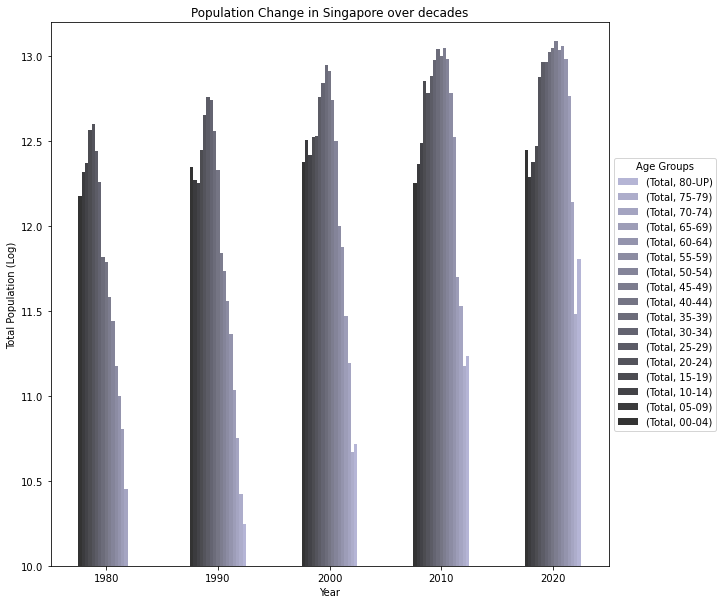

In [331]:
group = 'all' #males/females/all
age_lower = 0 #rounds to nearest 5 (actual range: 10 to 65)
age_upper = 85
location = 'Singapore' #accepts country names/abbreviations, 'world'

years = [1980, 1990, 2000, 2010, 2020]
frames = []
for y in years:
    frames.append(pop_df(y, group, age_lower, age_upper, location))
    
result = pd.concat(frames, axis=0, ignore_index = True)
result = result.drop(columns = ['Male', 'Female', 'Country'])
result = result.pivot(index='Year', columns='Age')

for c in result:
    result[c] = np.log(result[c])

my_colors = [(x/25, x/25, x/20, 0.75) for x in range(17)] 
graph = result.plot(kind='bar', figsize=(10,10), ylim=(10, 13.2), legend='reverse', rot=0, alpha=0.8, 
                    color=my_colors)
handles, labels = graph.get_legend_handles_labels()
graph.set_ylabel('Total Population (Log)');
graph.set_title("Population Change in {} over decades".format(location))
graph.legend(handles[::-1], labels[::-1], title='Age Groups', loc='center left', bbox_to_anchor=(1.0, 0.5));

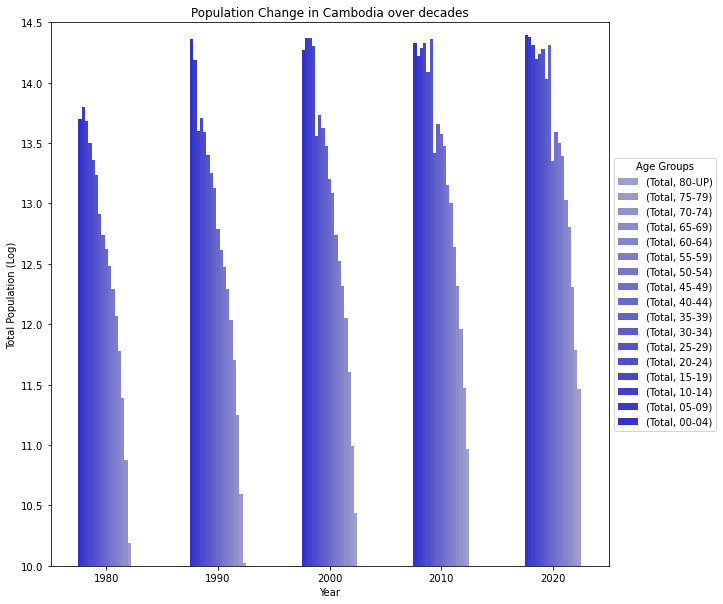

In [332]:
group = 'all' #males/females/all
age_lower = 0 #rounds to nearest 5 (actual range: 10 to 65)
age_upper = 85
location = 'Cambodia' #accepts country names/abbreviations, 'world'

years = [1980, 1990, 2000, 2010, 2020]
frames = []
for y in years:
    frames.append(pop_df(y, group, age_lower, age_upper, location))
    
result = pd.concat(frames, axis=0, ignore_index = True)
result = result.drop(columns = ['Male', 'Female', 'Country'])
result = result.pivot(index='Year', columns='Age')

for c in result:
    result[c] = np.log(result[c])

my_colors = [(x/30, x/30, 0.75) for x in range(17)] 
graph = result.plot(kind='bar', figsize=(10,10), ylim=(10, 14.5), legend='reverse', rot=0, alpha=0.8, color=my_colors)
handles, labels = graph.get_legend_handles_labels()
graph.set_ylabel('Total Population (Log)');
graph.set_title("Population Change in {} over decades".format(location))
graph.legend(handles[::-1], labels[::-1], title='Age Groups', loc='center left', bbox_to_anchor=(1.0, 0.5));

In [189]:
def draw_scatterplot(two_indicators_dict, year, title, color='#a442f5', countries='all'):
    if countries == 'sea':
        countries_iso3166 = ['MMR', 'THA', "VNM", 'KHM', 'MYS', 'IDN', 'PHL', 'BRN']
    else:
        countries_iso3166 = 'all'
    d_values = list(two_indicators_dict.values())
    df = wbdata.get_dataframe(two_indicators_dict, country=countries_iso3166)
    df.reset_index(inplace=True)
    df['date'] = df['date'].astype(int)
    df = df[df['date'] == year]
    df = df.sort_values(by=['country'])
    df = df[[d_values[0], d_values[1]]]
    graph = df.plot.scatter(x=d_values[0], y=d_values[1], s=100, c=color , figsize=(10,10))
    graph.set_title(title, size=15, pad=15);

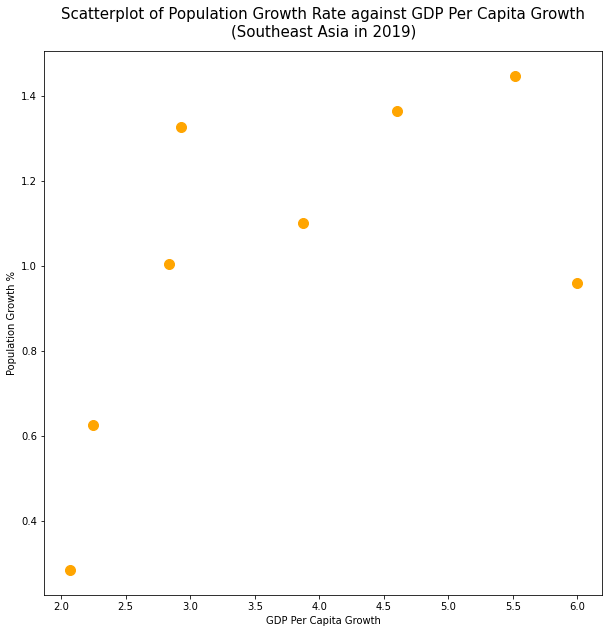

In [197]:
#indicators
#'NY.GDP.PCAP.KD.ZG': GDPPC
#'SP.POP.GROW': Pop Growth %
two_indicators_dict = {'NY.GDP.PCAP.KD.ZG': 'GDP Per Capita Growth', 
                       'SP.POP.GROW': 'Population Growth %'}
title = 'Scatterplot of Population Growth Rate against GDP Per Capita Growth\n(Southeast Asia in 2019)'
draw_scatterplot(two_indicators_dict, 2019, title, 'orange', 'sea')

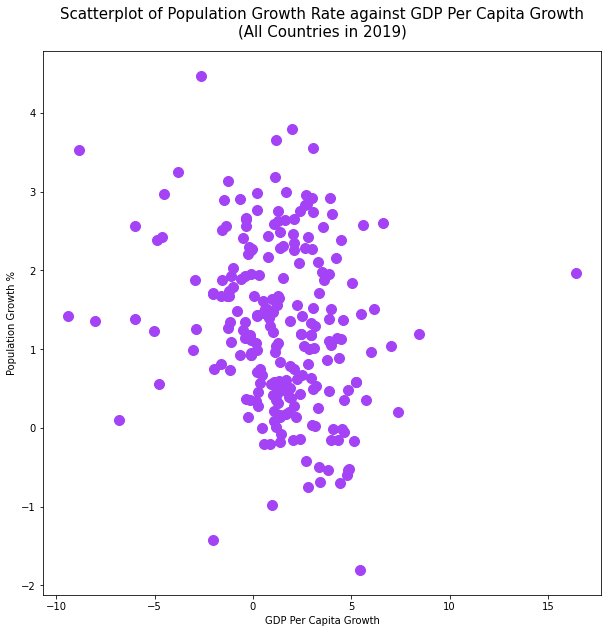

In [198]:
#indicators
#'NY.GDP.PCAP.KD.ZG': GDPPC
#'SP.POP.GROW': Pop Growth %
two_indicators_dict = {'NY.GDP.PCAP.KD.ZG': 'GDP Per Capita Growth', 'SP.POP.GROW': 'Population Growth %'}
title = 'Scatterplot of Population Growth Rate against GDP Per Capita Growth\n(All Countries in 2019)'
draw_scatterplot(two_indicators_dict, 2019, title)